### Import desired libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,5)

Read data from csv file

In [ ]:
df = pd.read_csv("../input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
df.head()

In [ ]:
df.shape

<b>Drop features that are not required to build our model</b>

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()/df.shape[0]*100

<B>Above statastics shows <i>'society'</i> column contains 41.30% missing values. So, it is better to drop <i>'society'</i> column.</B>

In [ ]:
df['area_type'].unique()

In [ ]:
df_area_type_group =df.groupby('area_type')['area_type'].agg(Count='count')
plt.figure(figsize=(10,5))
area_type_plot = sns.barplot(x = df_area_type_group.index, y = df_area_type_group['Count'])
for i in area_type_plot.patches:
    area_type_plot.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()/2), va = 'bottom', color='black')

In [ ]:
df.balcony.unique()

In [ ]:
df_balcony_group = df.groupby('balcony')['balcony'].agg(Count='count')
plt.figure(figsize=(10,5))
balcony_plot = sns.barplot(x = df_balcony_group.index, y = df_balcony_group['Count'])
for i in balcony_plot.patches:
    balcony_plot.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()/2), va = 'bottom', color='black')

<b><i>'balcony'</i> column contains 4.57% missing values and these are missing completely at random. Hence, we can drop <i>'balcony'</i> column<i>'availabilty'</i> column is not required for the prediction of price of house, so it can be dropped.</b>

In [ ]:
df = df.drop(['area_type','balcony','availability','society'],axis='columns')
df

In [ ]:
# df.to_excel("pre_total_sqft.xlsx")
df[50:60]

<b>Data Cleaning: Handling missing values</b>

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()*100/df.shape[0]

In [ ]:
df_bath_group = df.groupby('bath')['bath'].agg(Count='count')
plt.figure(figsize=(10,5))
sns.barplot(x=df_bath_group.index, y = df_bath_group.Count)

1. <b>As <i>'bath'</i> column is of type missing completely at random(MCAR), it is better to drop null values present in this column.
2. <i>'location'</i> and <i>'size'</i>columns contain very less missing values. So, even if we drop these null values from dataset, it will not affect much.</b>

In [ ]:
df = df.dropna()
df.isnull().sum()

In [ ]:
df.shape
df[50:60]

### Feature Engineerng: Data wrangling

In size column, value is in string format like '3 BHK', so we have remove alphabets and just retreive integer values.

In [ ]:
import re
df['size'] = df['size'].str.replace(r'\D+', '').astype(int)

In [ ]:
df['size'].unique()

In [ ]:
size_plot = sns.countplot(x = 'size',data = df)
for i in size_plot.patches:
    size_plot.annotate(int(i.get_height()),(i.get_x(), i.get_height()+1),va = 'bottom', color='black')

In [ ]:
df.info()
df[50:60]

In [ ]:
# temp =df[df['total_sqft'].str.contains(r'[0-9]+[a-zA-Z]+') | df['total_sqft'].str.contains('\d+ - \d+')]
temp =df[df['total_sqft'].str.contains(r'[0-9]+[a-zA-Z]+') | df['total_sqft'].str.contains('[0-9]+ - [0-9]+')]
temp.head(10)

<b>If we analyze above table, we found <i>total_sqft</i> column contains values in various formats and should be converted in Sqft. Following are various patterns:
- 1015 \- 1540: We will take average of such values,
- 36.64Sq. Meter: 1 Sq. Meter * 10.7639 = 10.7639Sqft
- 2132Perch : 1 Perch * 272.25 = 272.25 Sqft
- 1234Sq. Yards: 1Sq. Yards*9 = 1 sqft
- Acres: 1 Acre * 43560 = 43560sqft
- Cents: 1 Cent * 435.5 = 435.5sqft
- Guntha: 1 Guntha * 1089 = 1089sqft
- Grounds: 1 Grounds*2400 = 2400sqft

    <i>convert_to_sqft()</i> function will calculate average of <i>total_sqfit</i> range values.</b>

In [ ]:
import re
def convert_to_sqft(str):
    tokens=str.split(' - ')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2 
    elif len(tokens)==1:
        if 'Sq. Meter' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*10.7639)
        elif 'Perch' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*272.25)
        elif 'Sq. Yards' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*9)
        elif 'Acres' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*43560)
        elif 'Cents' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*435.5)
        elif 'Guntha' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*1089)
        elif 'Grounds' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*2400)
        else:
            return float(tokens[0])
    else:
        return None

Apply <i>convert_to_sqft()</i> function should be applied in <i>'total_sqft'</i>.

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df

In [ ]:
df.info()

### Feature Engineering
Add new feature <i>'Price_per_sqft' column</i>.

In [ ]:
df['Price_per_sqft'] = df['price']*100000/df['total_sqft']
df

In [ ]:
df['Price_per_sqft'].describe()

In [ ]:
sns.kdeplot(df['Price_per_sqft'])

### Dimensionality Reduction
<b>Examine location feature and check dimensionality. If there are more number of rows, we have to apply dimensionality detection techniques(Reducing the number of rows)</b>

In [ ]:
df['location'].unique()

In [ ]:
plt.figure(figsize=(10,5))
location_statatistics = df.groupby('location')['location'].agg('value_counts').sort_values(ascending=False)
sns.histplot(location_statatistics)

In [ ]:
location_statatistics.unique()

In [ ]:
location_statatistics_less_than_10 = location_statatistics[location_statatistics<=10]
location_statatistics_less_than_10

<b>If location count is less than 10, then that particular location should be replaced by 'other' string.</b>

In [ ]:
df.location =df.location.apply(lambda x: 'other' if x in location_statatistics_less_than_10 else x)
len(df.location.unique())

In [ ]:
df.shape

In [ ]:
df.groupby('location')['location'].agg('value_counts').sort_values(ascending=False)

### Handling Outliers
<b>As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.</b>

In [ ]:
df = df[~((df['total_sqft']/df['size'])<300)]
df

## Outlier Removal Using Standard Deviation and Mean

In [ ]:
df.Price_per_sqft.describe()

<b>Here, we find that min price per sqft is 2.25 rs/sqft, which is very less. If you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally minimum per square ft price is at least 250 rs/sqft. So, we will exclude data points which contain per sqft price less than 250 rs/sqft.</b>

In [ ]:
df = df[df['Price_per_sqft']>=250]

In [ ]:
df['Price_per_sqft'].describe()

<b>From above statistics, we find that min price per sqft is 219.68 rs/sqft and max price per sqft is 176470rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.</b>

In [ ]:
def remove_outliers_per_location(df):
    df_out = pd.DataFrame()
    for key, per_location_df in df.groupby('location'):
        upper_limit = np.mean(per_location_df['Price_per_sqft']) + np.std(per_location_df['Price_per_sqft'])
        lower_limit = np.mean(per_location_df['Price_per_sqft']) - np.std(per_location_df['Price_per_sqft'])
        reduced_df = per_location_df[(per_location_df.Price_per_sqft>lower_limit) & (per_location_df.Price_per_sqft<=upper_limit)]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_outliers_per_location(df)
df.shape

In [ ]:
df['Price_per_sqft'].describe()

<b>Let's check prices of flats having same sqft area having less number of bedrooms, but have more price than the flats having more number of bedrooms in same location. If such samples are present in dataset, then these are outliers and should be removed from dataset.</b>
Following is the analysis of location <b><i>Raja Rajeshwari Nagar</i></b>. We have plotted a scatter plot from which we can easily understand whether outliers are present or not.

In [ ]:
def scatter_plot(df,location):
    bhk2 = df[(df['location']==location) & (df['size'] == 2)]
    bhk3 = df[(df['location']==location) & (df['size'] == 3)]
    matplotlib.rcParams['figure.figsize']=(5,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
scatter_plot(df,'Raja Rajeshwari Nagar')

If we analyze above scatter plot, we say that there are few samples having same total sqft area but less number of bedrooms and more price than the other one having more number bedrooms.

To remove outliers, we will build a dictionary containing statastics per bhk i.e.

{

    '1' : {
        'mean': 6485.843278998773,
        'std: 11248.767983981796,
        'count': 649
    },
    '2' : {
        'mean': 5175.857042073552,
        'std: 2076.3946380067705,
        'count': 5527
    },    
}

In [ ]:
def remove_greater_price_outliers(df):
    exclude_indices =np.array([])
    for location, location_df in df.groupby('location'):
        bhk_statastics = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_statastics[bhk] = {
                'mean' : np.mean(bhk_df['Price_per_sqft']),
                'std': np.std(bhk_df['Price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            prev_bhk_statastics = bhk_statastics.get(bhk-1)
            if prev_bhk_statastics and prev_bhk_statastics['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df['Price_per_sqft'])<(prev_bhk_statastics['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')
df = remove_greater_price_outliers(df)

In [ ]:
df.shape

<b>Now, let us analyze location <i>''</i> after removing outliers. </b>

In [ ]:
scatter_plot(df,'Raja Rajeshwari Nagar')

<b>Before and after removal outliers : Raja Rajeshwari Nagar</b>
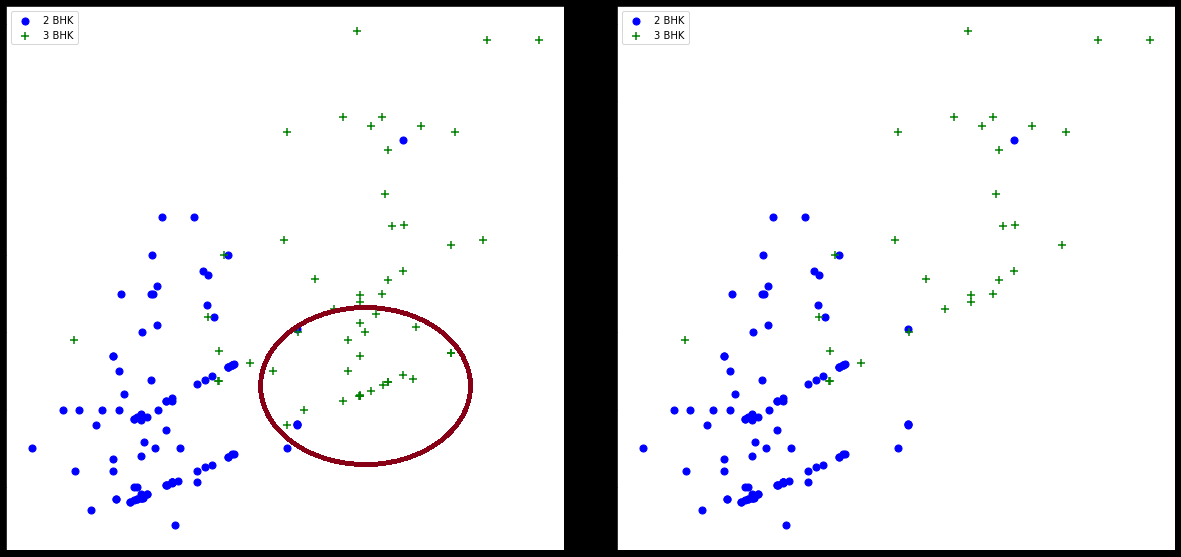

In [ ]:
matplotlib.rcParams['figure.figsize']=(5,5)
sns.kdeplot(df['Price_per_sqft'])

### Outlier removal based on number of bedrooms feature

In [ ]:
df.bath.unique()

<b>Again the business manager has a conversation with you (i.e. a data scientist) that if you have <i>x</i> bedroom home, then you will have total bath = total bed + 1 maximum bathrooms in home. Anything above that is an outlier or a data error and can be removed.</b>

In [ ]:
df[df['size']+1<df['bath']]

<b>Above records are outliers</b>

In [ ]:
df = df[df['size']+1>=df['bath']]
df = df.drop(['Price_per_sqft'], axis='columns')
df.head(5)

In [ ]:
df.shape

<b>1. Check Linearity of all independent features.</b>

In [ ]:
sns.kdeplot(x='size',y='price', data=df)

In [ ]:
sns.kdeplot(x='bath',y='price', data=df)

In [ ]:
sns.kdeplot(x='total_sqft',y='price', data=df)

## Onehot encoding of categorical feature: <i>Location</i>

In [ ]:
df_onehot = pd.get_dummies(df['location'])
df_onehot

In [ ]:
df_merge = pd.concat([df,df_onehot.drop('other',axis='columns')],axis='columns') 
df_merge

In [ ]:
df1 = df_merge.drop('location',axis='columns')
df1

In [ ]:
df_merge = df_merge.drop(['location'],axis='columns')
df_merge.shape

In [ ]:
df_merge

# Build a model to predict a price

In [ ]:
X = df_merge.drop(['price'], axis = 'columns')
Y = df_merge['price']
print(X.shape)
print(Y.shape)

In [ ]:
X

In [ ]:
Y

<b>Split dataset into training and testing dataset</b>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)
X_train

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

## Find the best model using machine learning
<b>We will analyze the performance of decision tree regressor, random forest regressor and Support vector machine regressor.
    </b>

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def find_bestmodel_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'randomforest': {
            'model': RandomForestRegressor(),
            'params': {'n_estimators':[100]}
        },
        'SVR_rbf':{
            'model' : SVR(),
            'params' : {
                'kernel':['rbf'], 
                'C':[100],
                'gamma':[0.1], 
                'epsilon':[0.1]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_bestmodel_using_gridsearchcv(X,Y)

<b>From above analysis, we can say that linear regressor model gives better performance.</b>

### Test the random forest regressor model for few samples

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
print("Accuracy Score with training dataset : {}%".format(lr_model.score(X_train,Y_train)*100))
print("Accuracy Score with tesing dataset : {}%".format(lr_model.score(X_test,Y_test)*100))

In [ ]:
def predict_price(location,bhk,total_sqft,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = total_sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar', 2,1180, 2)

In [ ]:
predict_price('1st Phase JP Nagar', 3,2180, 3)

In [ ]:
predict_price('Indira Nagar', 3,1700, 3)

In [ ]:
predict_price('Indira Nagar', 4, 1000, 4)